<a href="https://colab.research.google.com/github/Shahimafiroz/LinearRegression-PCA/blob/main/PredictingGoldPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import packages
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# Save filepath for easier access
gold_file_path = '/content/drive/MyDrive/BE/sem7/ML/Experiments/MiniProjects/FINAL_USO.csv'

# Read the data with pandas and store it in a dataframe titled gold data
df = pd.read_csv(gold_file_path)

y = df['Adj Close']

# We will start out by selecting features gold ETF features
gold_features = ['Open','High', 'Low', 'Volume']
X = df[gold_features]
X.head()

,Open,High,Low,Volume
0,154.740005,154.949997,151.710007,21521900
1,154.309998,155.369995,153.899994,18124300
2,155.479996,155.860001,154.360001,12547200
3,156.820007,157.429993,156.580002,9136300
4,156.979996,157.529999,156.130005,11996100


#Check to see if we have any missing values that we need to impute or remove.

In [6]:
# There are no null values
df.isnull().values.any()

False

# Create Linear Regression Model
Just based on the first five predictions. We can see that gold_model fitted to the whole data set is able to predict the adjusted close value within a dollar. We will run the whole model through validation and get its mean absolute error.

In [7]:
# Define Model
gold_model = LinearRegression()

#Fit Model
gold_model.fit(X, y)

print("Making predicitons for the first 5 entries\n")
print(X.head())
print("\nThe predictions are:\n")
print(gold_model.predict(X.head()))
print("\nThe actual values are:\n")
print(y.head())


Making predicitons for the first 5 entries

         Open        High         Low    Volume
0  154.740005  154.949997  151.710007  21521900
1  154.309998  155.369995  153.899994  18124300
2  155.479996  155.860001  154.360001  12547200
3  156.820007  157.429993  156.580002   9136300
4  156.979996  157.529999  156.130005  11996100

The predictions are:

[152.55743325 154.81709905 154.92457233 157.14066214 156.77663033]

The actual values are:

0    152.330002
1    155.229996
2    154.869995
3    156.979996
4    157.160004
Name: Adj Close, dtype: float64


# Model Validation
calculate the mean absolute error (MAE) for a Linear Regression model's predictions of gold prices.

In [8]:
predicted_adj_close = gold_model.predict(X.head())
print(mean_absolute_error(y.head(),predicted_adj_close))

predicted_adj_close = gold_model.predict(X)
print(mean_absolute_error(y, predicted_adj_close))

0.2477890674518619
0.21905793913855734


# Partitioning Data
Since we did not split up our data into train, test, and validation sets, the above model could be overfitted.

**train_X:** This variable holds the features for the training set.

**val_X:**This variable holds the features for the validation set.

**train_y:** This variable holds the target values (actual adjusted close prices) for the training set.

**val_y:** This variable holds the target values for the validation set.



In [9]:
# Partition data into training and validation groups
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define a new model for training set Here, im re-define the gold_model as a new instance of a Linear Regression model.
#This new model will be trained on the training set i just created. It's a good practice to create a fresh model for the
#training set to avoid any carryover effects from the previous model that was fitted to the entire dataset.
gold_model = LinearRegression()
# Fit model
gold_model.fit(train_X, train_y)

#get predicted prices on validation data
val_predictions = gold_model.predict(val_X)
print(mean_absolute_error(val_y,val_predictions))


0.22434694336395747


# Creating a Data Pipeline
I'm creating a Linear Regression model using the `LinearRegression()` function from scikit-learn. This model will help me make predictions based on the input data.

To streamline the entire process, I'm using a pipeline called `my_pipeline`. In this pipeline, I bundle together the preprocessing and modeling steps. It's a convenient way to keep everything organized.

First, I fit the model to the training data (`train_X` and `train_y`). This step involves training the model to learn patterns in the training data, which it will later use for making predictions.

Next, I process the validation data (`val_X`) and use the trained model to make predictions on this data. The predictions are stored in the `preds` variable.

To assess how well the model is performing, I calculate the mean absolute error (MAE) between the actual target values for the validation set (`val_y`) and the predicted values (`preds`). The MAE quantifies the average difference between what the model predicts and the actual values, which helps me understand how accurate the model is.

Finally, I visualize the model's performance by creating a regression plot using Seaborn. This plot compares the actual values (`val_y`) with the model's predictions (`preds`). It's a graphical way to see how closely the model's predictions align with the actual data points.

MAE: 0.22434694336395747


<Axes: xlabel='Adj Close'>

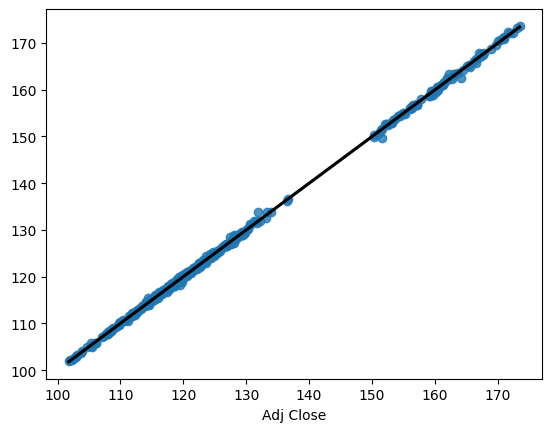

In [10]:
gold_model = LinearRegression()

# Bundle preporcessing and modeling code in a pipeline. (I'm setting up a data processing and modeling pipeline called my_pipeline.
#A pipeline is a powerful tool for streamlining the machine learning workflow, making it easier to combine data preprocessing and modeling steps in a structured manner.
#steps is a list that specifies the sequence of processing steps within the pipeline. In this case, there's only one step, which is the linear regression model.)
my_pipeline = Pipeline(steps=[('gold_model', gold_model)])
# Preprocessing of training data, fit model
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)

# Evaluate the model
mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

# Display Model
sns.regplot(x=val_y, y=preds, line_kws={"color":"black"})

# Run Model through Cross-Validation
In this step, I'm using cross-validation to assess the model's performance. Cross-validation helps ensure that the model's performance isn't highly dependent on the specific data split. I'm using the cross_val_score function from scikit-learn.

my_pipeline: I'm using the pipeline I created earlier, which combines preprocessing and modeling.
X and y: These are your feature and target data, respectively.
cv=10: I'm performing 10-fold cross-validation, which means the data is split into 10 subsets. The model is trained and evaluated 10 times, with a different subset used for validation in each iteration.
scoring='neg_mean_absolute_error': I'm using the negative mean absolute error (MAE) as the scoring metric. The negative sign is used to indicate that a higher MAE value is worse. By default, scikit-learn uses higher values for better performance, but for MAE, lower values are better.


In [11]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())

rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is",rmse)

r2 = r2_score(val_y, preds)
print("\nr2 score is", r2)


MAE scores:
 [0.33869539 0.28749731 0.27608857 0.18376062 0.19862309 0.20854433
 0.23916281 0.16176519 0.17072235 0.14091063] 

Average MAE score (across all ten folds):
0.22057702723377437

RMSE is 0.3257335889369903

r2 score is 0.9996725196712021


# Create a Gradient Boosting Model

In [9]:
my_model = XGBRegressor()
my_model.fit(train_X, train_y)

# Make predictions using XGBoost model
predictions = my_model.predict(val_X)
print("Mean Absolute Error: ",mean_absolute_error(predictions, val_y))

Mean Absolute Error:  0.36020771816860403


This is much worse than our linear regression model. We will need to adjust some of our parameters to make sure we get the best result XGBoost can afford us. We will start by changing:

* I'm creating an XGBoost regression model (my_model) with the following hyperparameters:

* n_estimators=1000: This sets the number of boosting rounds or iterations to 1000. The model will go through the modeling cycle 1000 times, learning from the data.

* learning_rate=0.03: I've set a learning rate of 0.03, which is a relatively small value. This makes the learning process more gradual and helps with better generalization.

* n_jobs=4: I'm utilizing four CPU cores (parallel processing) for faster model training. This setting takes advantage of multiple CPU cores, making the training process more efficient.





/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Mean Absolute Error 0.3426597039300957

RMSE is 0.5538266476945417

r2 score is 0.9990533099218121


<Axes: xlabel='Adj Close'>

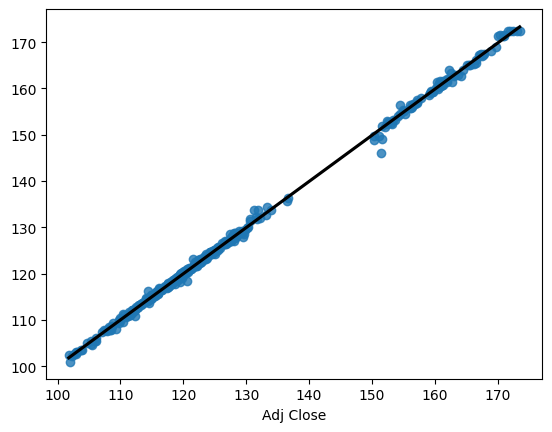

In [12]:
my_model = XGBRegressor(n_estimators=1000,
                        learning_rate=0.03,
                        n_jobs=4)
my_model.fit(train_X, train_y,
            early_stopping_rounds=5,
            eval_set=[(val_X, val_y)],
            verbose=False)

predictions = my_model.predict(val_X)
print("Mean Absolute Error",
      mean_absolute_error(predictions,val_y))

rmse = math.sqrt(mean_squared_error(val_y,predictions))
print("\nRMSE is", rmse)

r2 = r2_score(val_y,predictions)
print("\nr2 score is", r2)

sns.regplot(x=val_y, y=predictions, line_kws={"color": "black"})

###XGBoost vs Linear Regression model for the give data set
Overall, when using these specific parameters and validation techniques, the Linear Regression model outperforms XGBoost in terms of both MAE and RMSE. This suggests that for this specific dataset and problem, the Linear Regression model is slightly superior in terms of prediction accuracy. However, it's important to note that model performance can vary depending on the dataset and the chosen hyperparameters, so it's always a good practice to experiment with different models and settings to find the best-performing one for your specific task.

#Feature Engineering

---


We've built a model that can predict gold's daily adjusted close value with good accuracy. However, this dataset came with 79 predictor features. Obviously, the predictors I just used are most closely related to the adjusted close value. Now we will use feature engineering to determine what are highly correlated features and see if we can build a better model with them. We'll start by ranking features with mutual information and show which features rank the highest with seaborn.

In [14]:
# Refresh on what all of the features look like
# There are 79 predictor columns. I am not including Adj Close and Close of the 81 total.

plt.style.use("seaborn-whitegrid")

df.head()

<ipython-input-14-6c5ddbdd1776>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [15]:
# Create new ds with all predictor features. Take Adj Close as Y
# Remove Close because it is too close to Adj Close
X = df.copy()
y = X.pop('Adj Close')
date = X.pop('Date')
X.pop('Close')

0       152.330002
1       155.229996
2       154.869995
3       156.979996
4       157.160004
           ...    
1713    120.019997
1714    119.660004
1715    120.570000
1716    121.059998
1717    121.250000
Name: Close, Length: 1718, dtype: float64

In [16]:
# Create mutual info scores

# Define a function to calculate mutual information scores
def make_mi_scores(X, y):
    # Calculate mutual information scores using mutual_info_regression
    mi_scores = mutual_info_regression(X, y)

    # Convert the scores into a Pandas Series with feature names as the index
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)

    # Sort the features by MI Scores in descending order
    mi_scores = mi_scores.sort_values(ascending=False)

    # Return the sorted mutual information scores
    return mi_scores

# Call the function to calculate MI scores for the given predictor features (X) and target variable (y)
mi_scores = make_mi_scores(X, y)


#Construct a bar plot to show each feature's score.

"GDX" typically refers to the VanEck Vectors Gold Miners exchange-traded fund ,

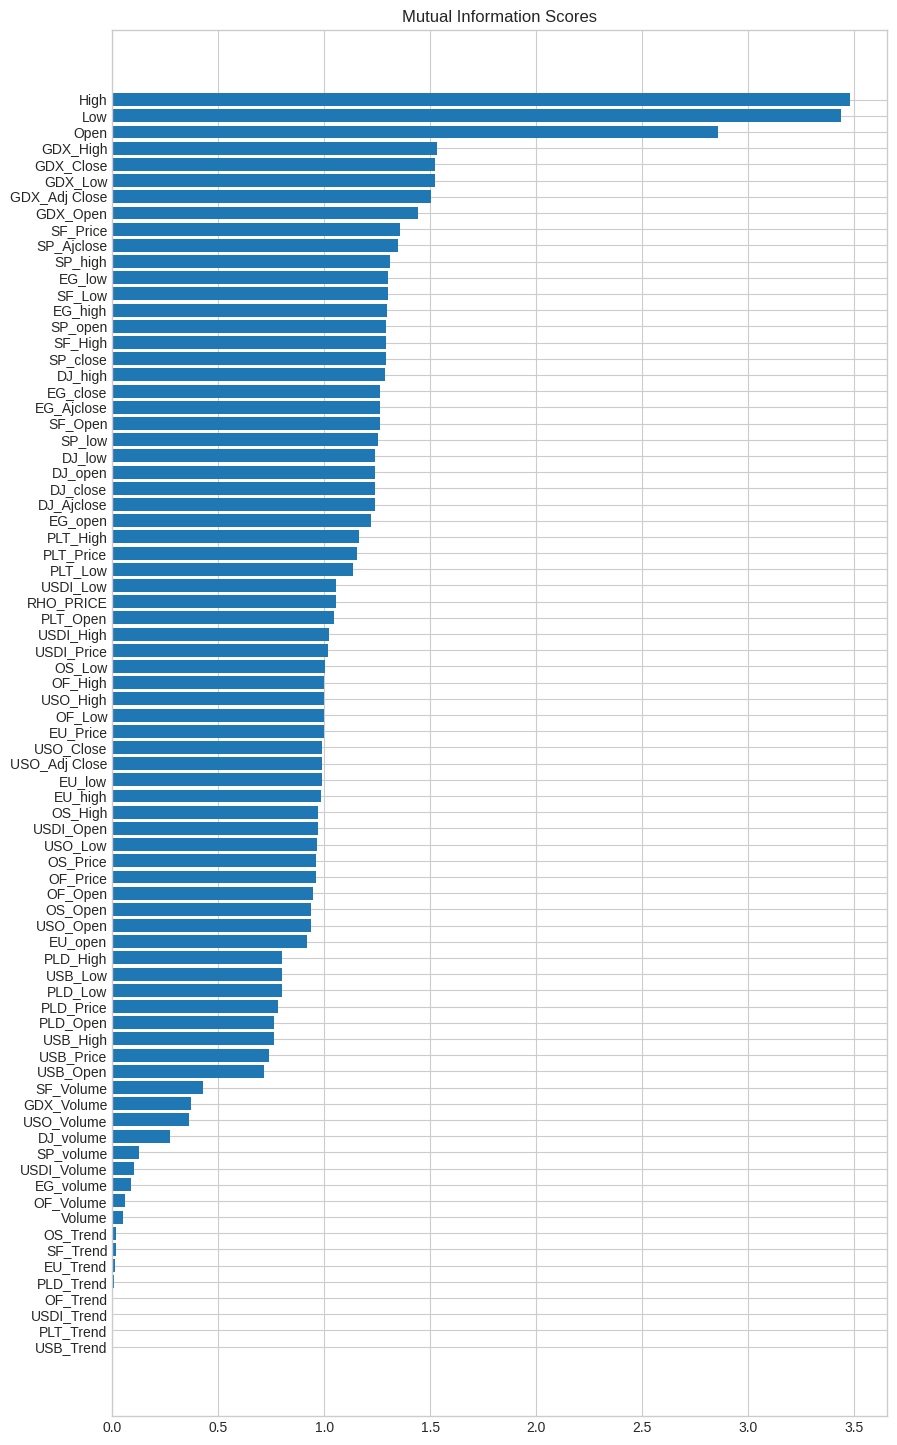

In [17]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(10,18))
plot_mi_scores(mi_scores)



Our prior models excelled due to effective predictors: "High," "Low," and "Open." However, the "Volume" predictor had low mutual information, even compared to other market indices.

We'll omit "Volume" and consider adding "GDX_High" and "GDX_Close" as superior predictors. Features linked to volume and market trends consistently exhibit lower mutual information than "High," "Low," and "Open" predictors. These three strongly correlate with "Adj Close," as demonstrated in regression plots. Reduced mutual information rankings indicate weaker correlations.

---
The code below is used to create a regression plot (scatter plot with a regression line) to visualize the relationship between the "High" feature and the "Adj Close" target variable in the DataFrame df.

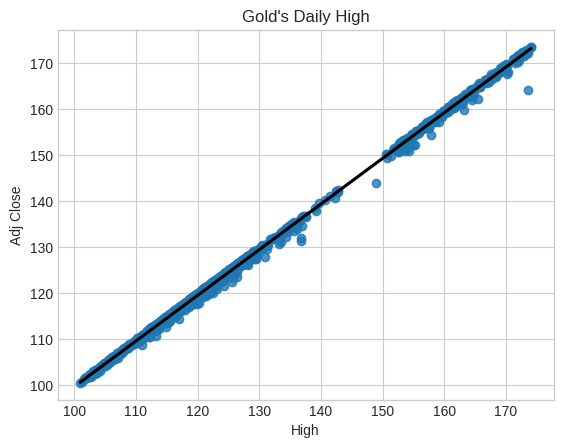

In [18]:
daily_high = sns.regplot(x="High", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily High")

---
This code is quite similar to the previous code you provided. It creates another regression plot, but this time, it focuses on the relationship between the "Low" feature and the "Adj Close" target variable in the DataFrame df

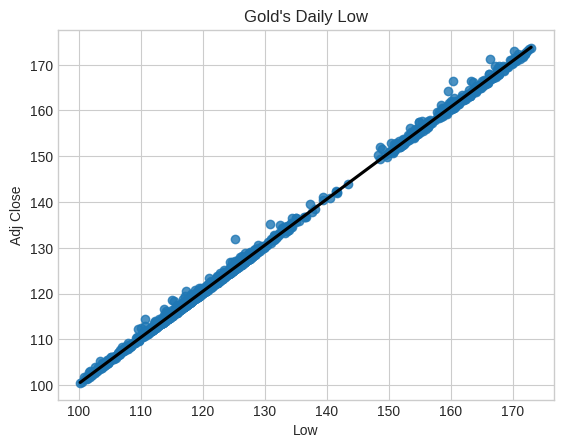

In [19]:
daily_low = sns.regplot(x="Low", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily Low")

---

It creates another regression plot, relationship between the "Open" feature and the "Adj Close" target variable in the DataFrame df.

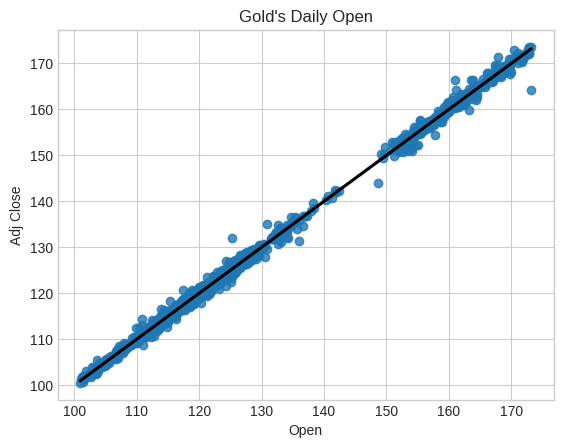

In [20]:
daily_close = sns.regplot(x="Open", y="Adj Close", data=df, line_kws={"color": "black"}).set(title="Gold's Daily Open")

# Creating a "Daily Change Feature " and applying it on time series
We can see that these three native features are very good predictors for the adjusted close price. However, what if we can create a new feature that can lend a little more insight into the price of gold. In the code below, we will create a feature called "daily change" by taking the price difference from open and close. Daily change is useless as a predictor on its own, but maybe we can apply it to time-series data to see any trends. Daily change is a way to track the volatility of gold prices.

* **Creating the "Daily Change" Feature:**
 `df["Daily_Change"] = abs(X.High - X.Low)`: This line of code calculates the "daily change" feature by taking the absolute difference between the "High" and "Low" prices for each day. The absolute difference is used to capture the magnitude of price changes without regard to direction.
* **Date Format Conversion:**
`df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')`: This code converts the "Date" column from a string format to a datetime format. This conversion is important for visualizing the data in a time-series format and allows for the display of yearly ticks on the X-axis of the plot.

* **Plotting Volatility:**
 `sns.set(rc={"figure.figsize":(20, 4)}`: This line sets the figure size for the plot, ensuring it has appropriate dimensions for visualization.
daily_change = sns.lineplot(x="Date", y="Daily_Change", data=df).set(title="Gold's Daily Change/Volatility"): Here, a line plot is created using Seaborn (sns). It visualizes the "daily change" feature over time, with "Date" on the X-axis and "Daily_Change" (volatility) on the Y-axis. The .set() method sets the title of the plot as "Gold's Daily Change/Volatility."


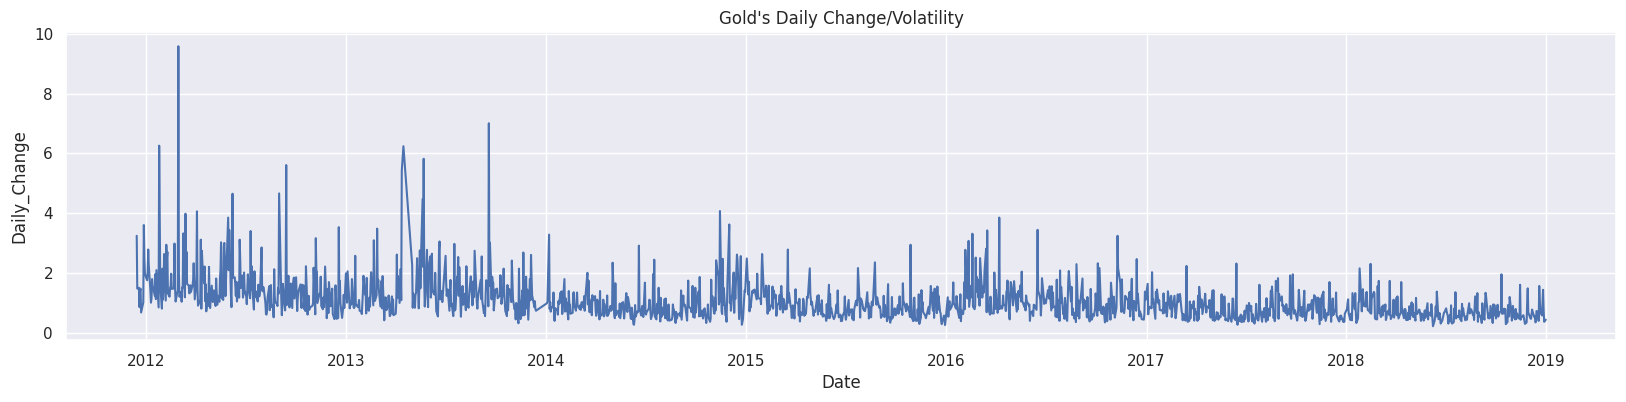

In [21]:
df["Daily_Change"] = abs(X.High - X.Low)

# Convert Date from string to datetime to give us yearly ticks on the X-axis
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# Plot volatility
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Daily_Change", data=df).set(title="Gold's Daily Change/Volatility")

#Observing and  Splitting the data from 2012-2013 and 2017-2018
We can see that gold prices have gotten less volatile since 2012. Around after mid-2017, gold seems to have become less volatile to the end of 2018. If we were to split up the data from 2012-2013 and 2017-2018 and run them through our linear regression model, we would get better performance from the 2017-2018 dataset because the prices have less daily variation than the 2012-2013 subset. The main takeaway here is that gold volatility has decreased overtime. However, the Adjusted Close has also gone down, as visualized below.

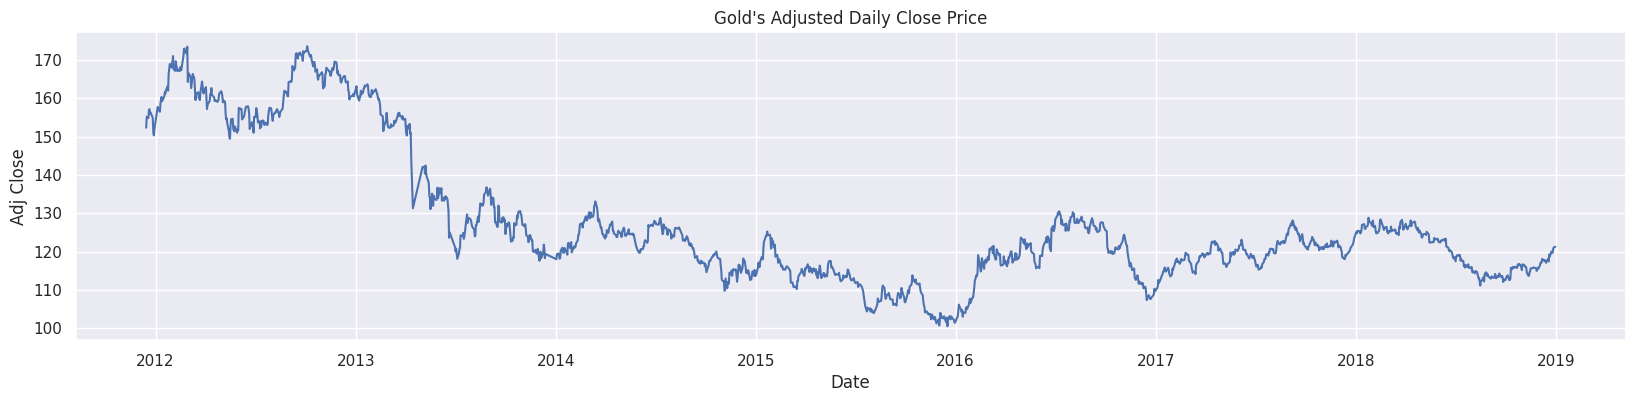

In [22]:
# Adjusted Close with Time Series
sns.set(rc={"figure.figsize":(20, 4)})
daily_change = sns.lineplot(x="Date", y="Adj Close", data=df).set(title="Gold's Adjusted Daily Close Price")

---
#PCA - PRINCIPAL COMPONENT ANALYSIS

Next we'll apply principal component analysis (PCA). PCA will be good to use with this dataset for two reasons.

The first is that PCA works well with numeric features. All of our features, with the exception of Date, are numeric features.
Many of our features are redundant and are closely related mutual information scores. A lot of them can be removed or combined to create principal components. We already know that High, Low, and Open have the highest mutual information scores. We also know that those features alone produce a high-performing linear regression model. To experiment with something new. We will leave in the top six features, which means including the gold index(GDX) features.

* Feature Selection:

`features = ["High", "Low", "Open", "GDX_High", "GDX_Low", "GDX_Close"]`: This line defines a list of feature names that you want to retain for the analysis. These features include "High," "Low," and "Open" (representing gold prices) and "GDX_High," "GDX_Low," and "GDX_Close" (representing features related to the "Gold Index (GDX)"). These are the top six features you mentioned earlier.

* Data Preparation:

  * `X = df.copy()`: This line creates a copy of the original DataFrame df and assigns it to the variable X. This copy will be used for further data manipulation.
  * `y = X.pop('Adj Close')`: This line removes the "Adj Close" column from X and assigns it to the variable y. This column will be the target variable for your analysis.
  * `date = X.pop('Date')`: Similarly, the "Date" column is removed from X and assigned to the variable date.
  * `X.pop('Close')`: The "Close" column is also removed from X.
  * `X = X.loc[:, features]`: This line selects only the columns specified in the features list, effectively reducing the dataset to these selected features.

* Standardization:

`X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)`: This line standardizes the selected features in X to have a mean of 0 and a standard deviation of 1. Standardization is important for PCA, as it ensures that all features have the same scale. PCA is sensitive to scale, and standardizing the data prevents any single feature from dominating the analysis





In [23]:
features = ["High", "Low", "Open", "GDX_High", "GDX_Low", "GDX_Close"]

X = df.copy()
y = X.pop('Adj Close')
date = X.pop('Date')
X.pop('Close')
X = X.loc[:, features]

# Standardize the new df. PCA is sensitive to scale.
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

* PCA Transformation:
`pca = PCA()`: This line initializes a PCA object without specifying the number of components to retain, which means it will retain all available components.
X_pca = pca.fit_transform(X_scaled): Here, PCA is applied to the standardized data in X_scaled. The fit_transform method computes the principal components and transforms the data into the new feature space defined by these components. X_pca will now contain the principal components as columns.

* Conversion to DataFrame:
`component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]:` This line creates a list of column names for the principal components. The column names will be `"PC1," "PC2," "PC3,"` and so on, corresponding to the number of retained components.

* `X_pca = pd.DataFrame(X_pca, columns=component_names)`: It converts the transformed PCA data X_pca into a DataFrame, with the principal components named as "PC1," "PC2," etc. This DataFrame will allow you to explore and analyze the principal components more easily.

In [24]:
# Create principal componenets
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range (X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,4.786447,1.084283,0.062709,0.089771,0.020374,-0.008956
1,4.895857,1.091385,-0.013283,-0.007822,-0.004370,-0.009334
2,4.823785,0.920197,0.005722,0.050612,-0.030129,-0.008412
3,5.092355,0.949527,-0.042882,-0.010260,0.000476,0.002431
4,5.095494,0.961803,-0.020048,0.008791,0.007451,0.000329


The result is a DataFrame (X_pca) that contains the principal components obtained through PCA. These components represent combinations of the original features that capture the most significant variations in the data.


In this code, you are creating a DataFrame named "loadings" to store the loadings or coefficients of the original features on the principal components obtained through PCA. Here's what each part of the code does:

- `pca.components_.T`: This part retrieves the loadings from the PCA object. The `pca.components_` attribute contains the loadings, and `.T` is used to transpose the matrix of loadings. Transposing is necessary to match the format with the original features.

- `columns=component_names`: This sets the column names for the "loadings" DataFrame to the names of the principal components, which were previously defined as "PC1," "PC2," etc.

- `index = X.columns`: The "loadings" DataFrame uses the index (rows) to identify the original features from the dataset, which are taken from the columns of the `X` DataFrame.

The result is a DataFrame named "loadings" that provides a view of how each original feature contributes to each principal component. These loadings indicate the strength and direction of the relationship between the features and the principal components, which is valuable for understanding the impact of each feature on the derived components.

In [25]:
# Wrap the PCA loadings up in a dataframe
loadings = pd.DataFrame(
    pca.components_.T,       # Transpose the matrix of loadings
    columns=component_names, # to turn columns into principal components
    index = X.columns,       # and the rows are original features, so we can identify them
)
loadings


,PC1,PC2,PC3,PC4,PC5,PC6
High,0.408326,-0.401039,0.529359,-0.274509,0.192727,-0.528883
Low,0.408168,-0.413142,-0.558814,-0.298090,-0.510041,0.037945
Open,0.408236,-0.410488,0.040841,0.563978,0.321422,0.491724
GDX_High,0.408251,0.408309,0.433426,0.271772,-0.632694,0.067782
GDX_Low,0.408318,0.402371,-0.466389,0.320687,0.285792,-0.518978
GDX_Close,0.408190,0.413960,0.021448,-0.583966,0.342671,0.450686


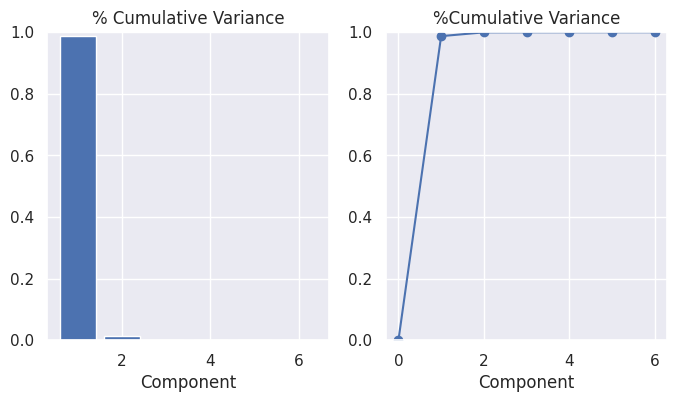

In [26]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1,2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0,cv], "o-")
    axs[1].set(
        xlabel="Component", title="%Cumulative Variance", ylim=(0.0,1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

# Look at the explained variance from PCA
plot_variance(pca);

In [27]:
# View MI Scores for the principal components
mi_scores = make_mi_scores(X_pca, y)
mi_scores


PC1    2.185637
PC2    0.509303
PC3    0.113681
PC5    0.095419
PC4    0.034708
PC6    0.011097
Name: MI Scores, dtype: float64

# New Data Pipeline with PCA
Now that we can see how worthy each principal component is, we can better determine which ones we should add to our new pipeline. In this instance, we will include all prinicpal components in our new pipeline The goal is to beat an MAE of 0.221 after a 10-fold cross validation.

MAE: 0.2011137068925935


[Text(0.5, 1.0, 'Linear Regression with PCA')]

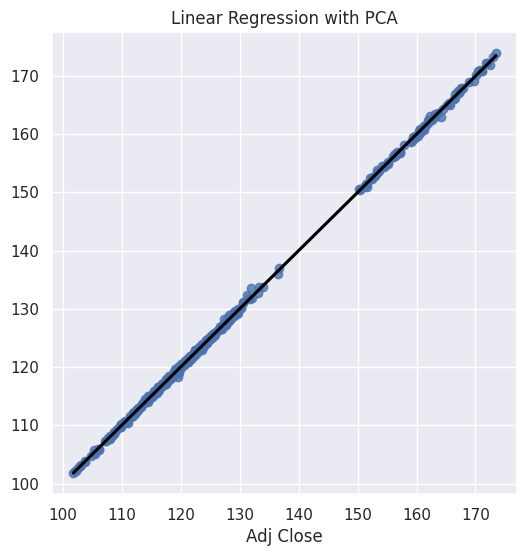

In [29]:
# Partition the PCA dataframe into training and validation groups
train_X, val_X, train_y, val_y = train_test_split(X_pca, y, random_state = 0)

gold_model = LinearRegression()

# Bundle preporcessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('gold_model', gold_model)])
# Preprocessing of training data, fit model
my_pipeline.fit(train_X, train_y)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(val_X)

# Evaluate the model
mae_score = mean_absolute_error(val_y, preds)
print('MAE:', mae_score)

# Display Model
sns.set(rc={"figure.figsize":(6,6)})
sns.regplot(x=val_y, y=preds, line_kws={"color":"black"}).set(title="Linear Regression with PCA")

# We can already see PCA helped us improve the model's MAE by 0.20. Let's run the new pipeline through cross-validation to get a more accurate score.

In [30]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X_pca, y,
                              cv=10,
                              scoring = 'neg_mean_absolute_error')
print("MAE scores:\n",scores,"\n")
print("Average MAE score (across all ten folds):")
print(scores.mean())
rmse = math.sqrt(mean_squared_error(val_y,preds))
print("\nRMSE is", rmse)
r2 = r2_score(val_y,preds)
print("\nr2 score is", r2)

MAE scores:
 [0.29200777 0.27589726 0.24365488 0.15945436 0.17239864 0.17891691
 0.19767476 0.13222747 0.15118348 0.12333965] 

Average MAE score (across all ten folds):
0.19267551793350662

RMSE is 0.27542712552287113

r2 score is 0.9997658611136764


# THREE MODELS PERFORMANCE RESULTS

In [31]:
results = [['Linear Regression', 0.221, 0.326, 0.999672],
           ['Gradient Boosting (XGBoost)', 0.325, 0.490, 0.999259],
           ['Linear Regression with PCA', 0.193, 0.275, 0.999766]]
results_df = pd.DataFrame(results, columns = ['Model Type', 'MAE', 'RMSE', 'r2'])
results_df


,Model Type,MAE,RMSE,r2
0,Linear Regression,0.221,0.326,0.999672
1,Gradient Boosting (XGBoost),0.325,0.490,0.999259
2,Linear Regression with PCA,0.193,0.275,0.999766


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(results_df, *['MAE'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(results_df, *['RMSE'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(results_df, *['r2'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(results_df, *['Model Type'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(results_df, *[[['MAE', 'RMSE'], ['RMSE', 'r2']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(results_df, *['MAE'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(results_df, *['RMSE'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(results_df, *['r2'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(results_df, *['MAE', 'Model Type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(results_df, *['RMSE', 'Model Type'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(results_df, *['r2', 'Model Type'], **{'inner': 'stick'})
chart

# HURRAYYYY !!!! Running the PCA model through ten-fold cross validation gave us our best model performance across all metrics.

In [32]:
!apt-get install -y git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
